# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [2]:
DF=pd.read_csv("breast-cancer-wisconsin-data.csv")
DF.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [3]:
# Id columns is to identify rows hence can be skipped in analysis
# All columns have numerical values
# Class would be the target variable. Should be removed when PCA is done
DF.drop("ID",axis=1,inplace=True)

In [4]:
DF.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [5]:
DF.dtypes

ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [6]:
DF.shape

(699, 10)

In [7]:
DF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ClumpThickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


In [8]:
# Since Bare Nuclei column is missing in describe and it is object, we need to check for non-numeric data in this column

In [9]:
# For most of the columns, mean is greater than median => This means data looks to be skewed.

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [10]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column


In [11]:
DF.isnull().sum()    

ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [12]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?

In [13]:
DF[DF['Bare Nuclei'] == '?']['Bare Nuclei']

23     ?
40     ?
139    ?
145    ?
158    ?
164    ?
235    ?
249    ?
275    ?
292    ?
294    ?
297    ?
315    ?
321    ?
411    ?
617    ?
Name: Bare Nuclei, dtype: object

In [14]:
DF[DF['Bare Nuclei'] == '?']['Bare Nuclei'].shape

(16,)

In [15]:
DF = DF.replace('?', np.nan)    

In [16]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [17]:
DF.isnull().sum()

ClumpThickness                  0
Cell Size                       0
Cell Shape                      0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Normal Nucleoli                 0
Bland Chromatin                 0
Mitoses                         0
Class                           0
dtype: int64

In [18]:
DF.fillna(DF.median(),inplace=True)

In [19]:
DF.isnull().sum()

ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [20]:
# Check for correlation of variable

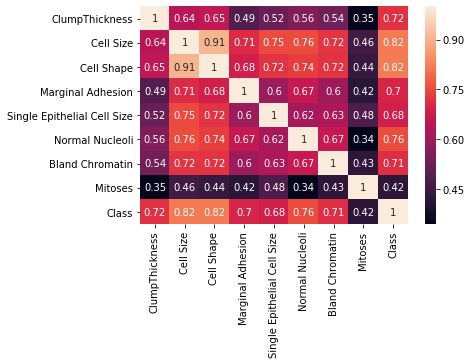

In [21]:
sns.heatmap(DF.corr(),annot=True)

In [22]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [23]:
# Since there is correlation between cell size and cell shape and both have almost similar correlation with other variable, we will drop one of the column
DF.drop('Cell Size',axis=1,inplace=True)

In [24]:
#Let us check for pair plots

In [25]:
DF.dtypes

ClumpThickness                  int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [26]:
DF['Bare Nuclei'] = DF['Bare Nuclei'].astype('int64') 

In [27]:
DF.dtypes

ClumpThickness                 int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

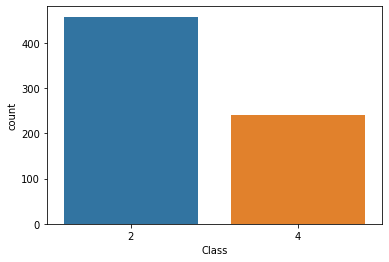

In [28]:
# 2 for benign, 4 for malignant
sns.countplot(DF['Class'])

In [29]:
DF.apply(lambda x: len(x.unique()))

ClumpThickness                 10
Cell Shape                     10
Marginal Adhesion              10
Single Epithelial Cell Size    10
Bare Nuclei                    10
Normal Nucleoli                10
Bland Chromatin                10
Mitoses                         9
Class                           2
dtype: int64

In [30]:
DF_X = DF.drop('Class',axis=1)

# Bi variate Analysis of ClumpThickness

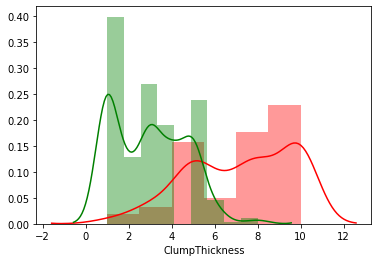

In [31]:
sns.distplot(DF[DF.Class == 4]['ClumpThickness'], color = 'r') # Malignant
sns.distplot(DF[DF.Class == 2]['ClumpThickness'], color = 'g')

In [32]:
# From above plot, Malignant cases have higher ClumpThickness

# Bi variate Analysis of Cell Shape

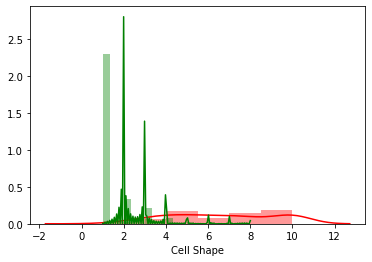

In [33]:
sns.distplot(DF[DF.Class == 4]['Cell Shape'], color = 'r') # Malignant
sns.distplot(DF[DF.Class == 2]['Cell Shape'], color = 'g')

In [34]:
# From above plot, Malignant cases have higher Cell Shape

# Bi variate Analysis of Marginal Adhesion

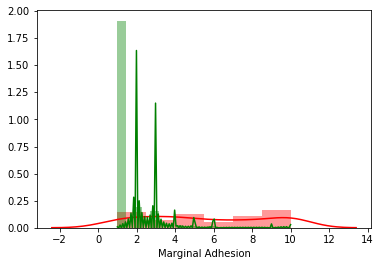

In [35]:
sns.distplot(DF[DF.Class == 4]['Marginal Adhesion'], color = 'r') # Malignant
sns.distplot(DF[DF.Class == 2]['Marginal Adhesion'], color = 'g')

# Bi variate Analysis of Single Epithelial Cell Size

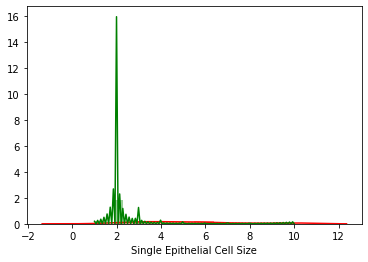

In [36]:
sns.distplot(DF[DF.Class == 4]['Single Epithelial Cell Size'], color = 'r') # Malignant
sns.distplot(DF[DF.Class == 2]['Single Epithelial Cell Size'], color = 'g')

# Bi variate Analysis of Bare Nuclei

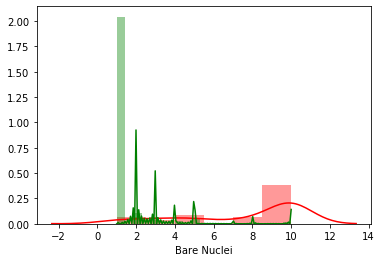

In [37]:
sns.distplot(DF[DF.Class == 4]['Bare Nuclei'], color = 'r') # Malignant
sns.distplot(DF[DF.Class == 2]['Bare Nuclei'], color = 'g')

# Bi variate Analysis of Normal Nucleoli

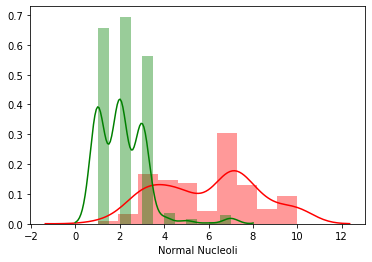

In [38]:
sns.distplot(DF[DF.Class == 4]['Normal Nucleoli'], color = 'r') # Malignant
sns.distplot(DF[DF.Class == 2]['Normal Nucleoli'], color = 'g')

# Bi variate Analysis of Bland Chromatin

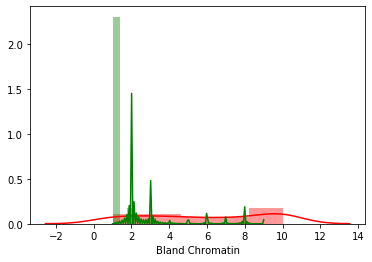

In [39]:
sns.distplot(DF[DF.Class == 4]['Bland Chromatin'], color = 'r') # Malignant
sns.distplot(DF[DF.Class == 2]['Bland Chromatin'], color = 'g')

# Bi variate Analysis of Mitoses

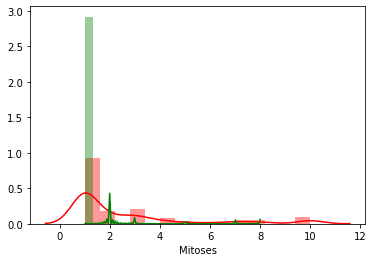

In [40]:
sns.distplot(DF[DF.Class == 4]['Mitoses'], color = 'r') # Malignant
sns.distplot(DF[DF.Class == 2]['Mitoses'], color = 'g')

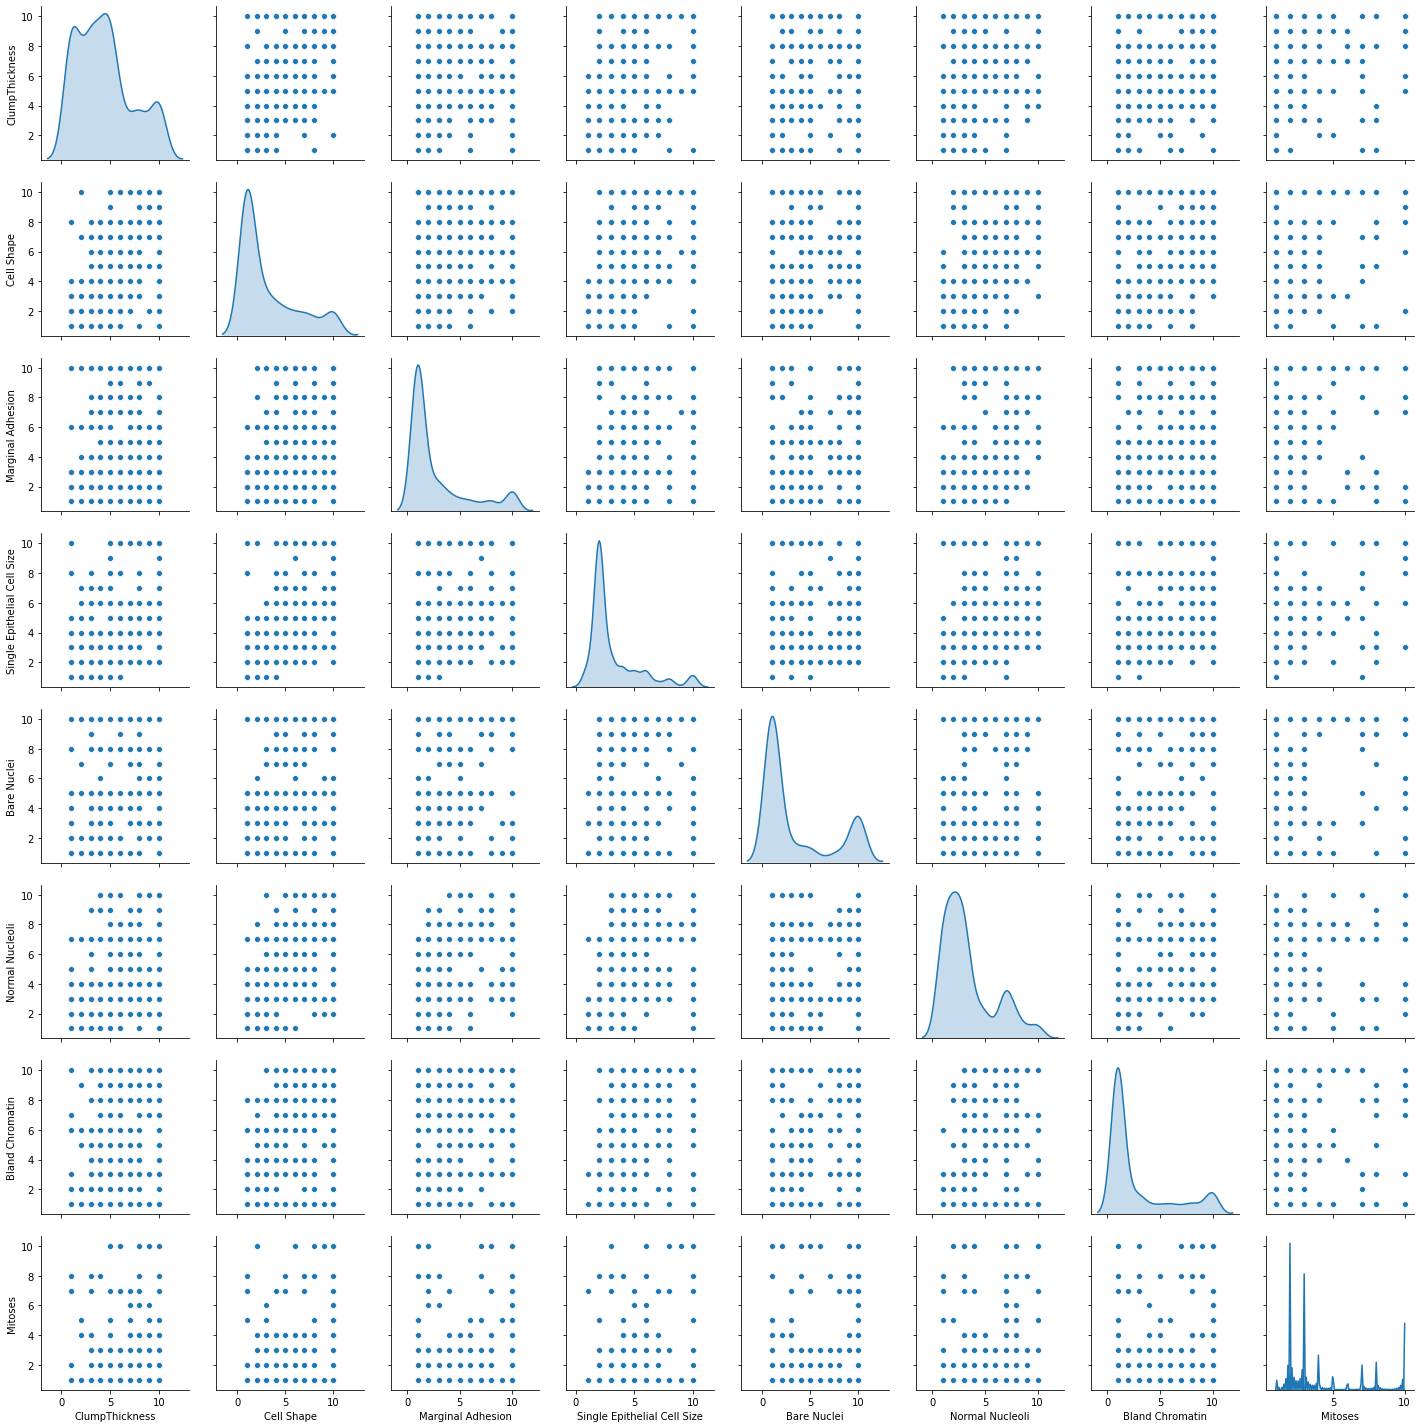

In [41]:
sns.pairplot(DF_X,diag_kind='kde')

In [42]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [43]:
DF.head()

,ClumpThickness,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,2,1,3,1,1,2
1,5,4,5,7,10,3,2,1,2
2,3,1,1,2,2,3,1,1,2
3,6,8,1,3,4,3,7,1,2
4,4,1,3,2,1,3,1,1,2


In [44]:
# Replacing all column Outliers with median

In [45]:
def replace(col):
    median, std = col.median(), col.std()  #Get the median and the standard deviation of every group 
    outliers = (col - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    col[outliers] = col.median()       
    return col

for i in range(0,8):
    no_outlier=DF_X.iloc[:,i].transform(replace)

In [46]:
# Before applying PCA, standard scaling is mandatory

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_Scaled =  sc.fit_transform(DF_X)

# Q6 Create a covariance matrix for identifying Principal components

In [48]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(X_Scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00143266 0.30122067 0.27547691 0.40164367 0.19998447 0.39697895
  0.24371214 0.25359326]
 [0.30122067 1.00143266 0.28100187 0.29664383 0.15567137 0.34885902
  0.31503067 0.18290123]
 [0.27547691 0.28100187 1.00143266 0.25958775 0.25315152 0.31453018
  0.2235622  0.1532801 ]
 [0.40164367 0.29664383 0.25958775 1.00143266 0.26607381 0.44564926
  0.24966438 0.23952293]
 [0.19998447 0.15567137 0.25315152 0.26607381 1.00143266 0.26600417
  0.21765193 0.06931421]
 [0.39697895 0.34885902 0.31453018 0.44564926 0.26600417 1.00143266
  0.35623582 0.31381906]
 [0.24371214 0.31503067 0.2235622  0.24966438 0.21765193 0.35623582
  1.00143266 0.16709528]
 [0.25359326 0.18290123 0.1532801  0.23952293 0.06931421 0.31381906
  0.16709528 1.00143266]]


# Q7 Identify eigen values and eigen vector

In [49]:
# Step 2- Get eigen values and eigen vector

In [50]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 0.38604387  0.17138167 -0.03719679 -0.67770707 -0.33833627  0.19434451
   0.40144464  0.21801138]
 [ 0.35496699  0.01839773  0.01116671 -0.12173868  0.67504207 -0.5593923
   0.14259029  0.26416175]
 [ 0.3315169  -0.29774987  0.10669436  0.15392291 -0.28292359  0.00323039
  -0.51455567  0.64926257]
 [ 0.39939534  0.05632103  0.51023149  0.53612298  0.04015809  0.30048653
   0.44406831 -0.02111367]
 [ 0.27744781 -0.63548749 -0.01659264 -0.26405408  0.34670647  0.42324692
  -0.16547003 -0.34993546]
 [ 0.43792826  0.10128964 -0.80039323  0.36094766 -0.08189827  0.04093825
   0.05083094 -0.12680565]
 [ 0.33527628 -0.13863107  0.2392397  -0.04176519 -0.42939222 -0.57461914
  -0.10608894 -0.53251439]
 [ 0.27272668  0.66718834  0.16920867 -0.1141079   0.19208842  0.21910459
  -0.56153988 -0.19645831]]

 Eigen Values 
%s [2.91538442 0.97033344 0.52168711 0.59944684 0.63961747 0.84446455
 0.74832094 0.77220654]


# Q8 Find variance and cumulative variance by each eigen vector

In [51]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  
cum_var_exp = np.cumsum(var_explained) 

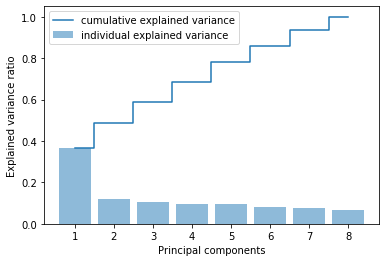

In [52]:
plt.bar(range(1,9), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,9),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [53]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_Scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [54]:
X_pca = pca.transform(X_Scaled)
pca.components_  

array([[ 0.38604387,  0.35496699,  0.3315169 ,  0.39939534,  0.27744781,
         0.43792826,  0.33527628,  0.27272668],
       [ 0.17138167,  0.01839773, -0.29774987,  0.05632103, -0.63548749,
         0.10128964, -0.13863107,  0.66718834],
       [-0.19434451,  0.5593923 , -0.00323039, -0.30048653, -0.42324692,
        -0.04093825,  0.57461914, -0.21910459],
       [-0.21801138, -0.26416175, -0.64926257,  0.02111367,  0.34993546,
         0.12680565,  0.53251439,  0.19645831],
       [-0.40144464, -0.14259029,  0.51455567, -0.44406831,  0.16547003,
        -0.05083094,  0.10608894,  0.56153988],
       [ 0.33833627, -0.67504207,  0.28292359, -0.04015809, -0.34670647,
         0.08189827,  0.42939222, -0.19208842],
       [ 0.67770707,  0.12173868, -0.15392291, -0.53612298,  0.26405408,
        -0.36094766,  0.04176519,  0.1141079 ],
       [-0.03719679,  0.01116671,  0.10669436,  0.51023149, -0.01659264,
        -0.80039323,  0.2392397 ,  0.16920867]])

# Q10 Find correlation between components and features

In [55]:
X_dot = np.dot(X_Scaled,pca.components_.T) # projecting original data into principal component dimensions
Proj_data_df = pd.DataFrame(X_dot)  # converting array to dataframe for pairplot

In [56]:
Proj_data_df.head()

,0,1,2,3,4,5,6,7
0,-0.691407,0.324559,-0.302475,-0.083402,-0.506409,0.466668,0.454118,-0.500094
1,1.289691,-0.647865,1.234282,-2.262241,0.854311,0.236560,0.260461,0.014364
2,-0.886035,-0.224062,-0.377261,0.335171,-0.027423,-0.063287,-0.023426,-0.475162
3,1.690496,-1.278641,0.943957,2.650612,-0.314849,1.718102,0.996988,0.840725
4,-0.363409,-0.214066,-0.215903,-0.979197,0.473998,0.742407,-0.101806,-0.318491


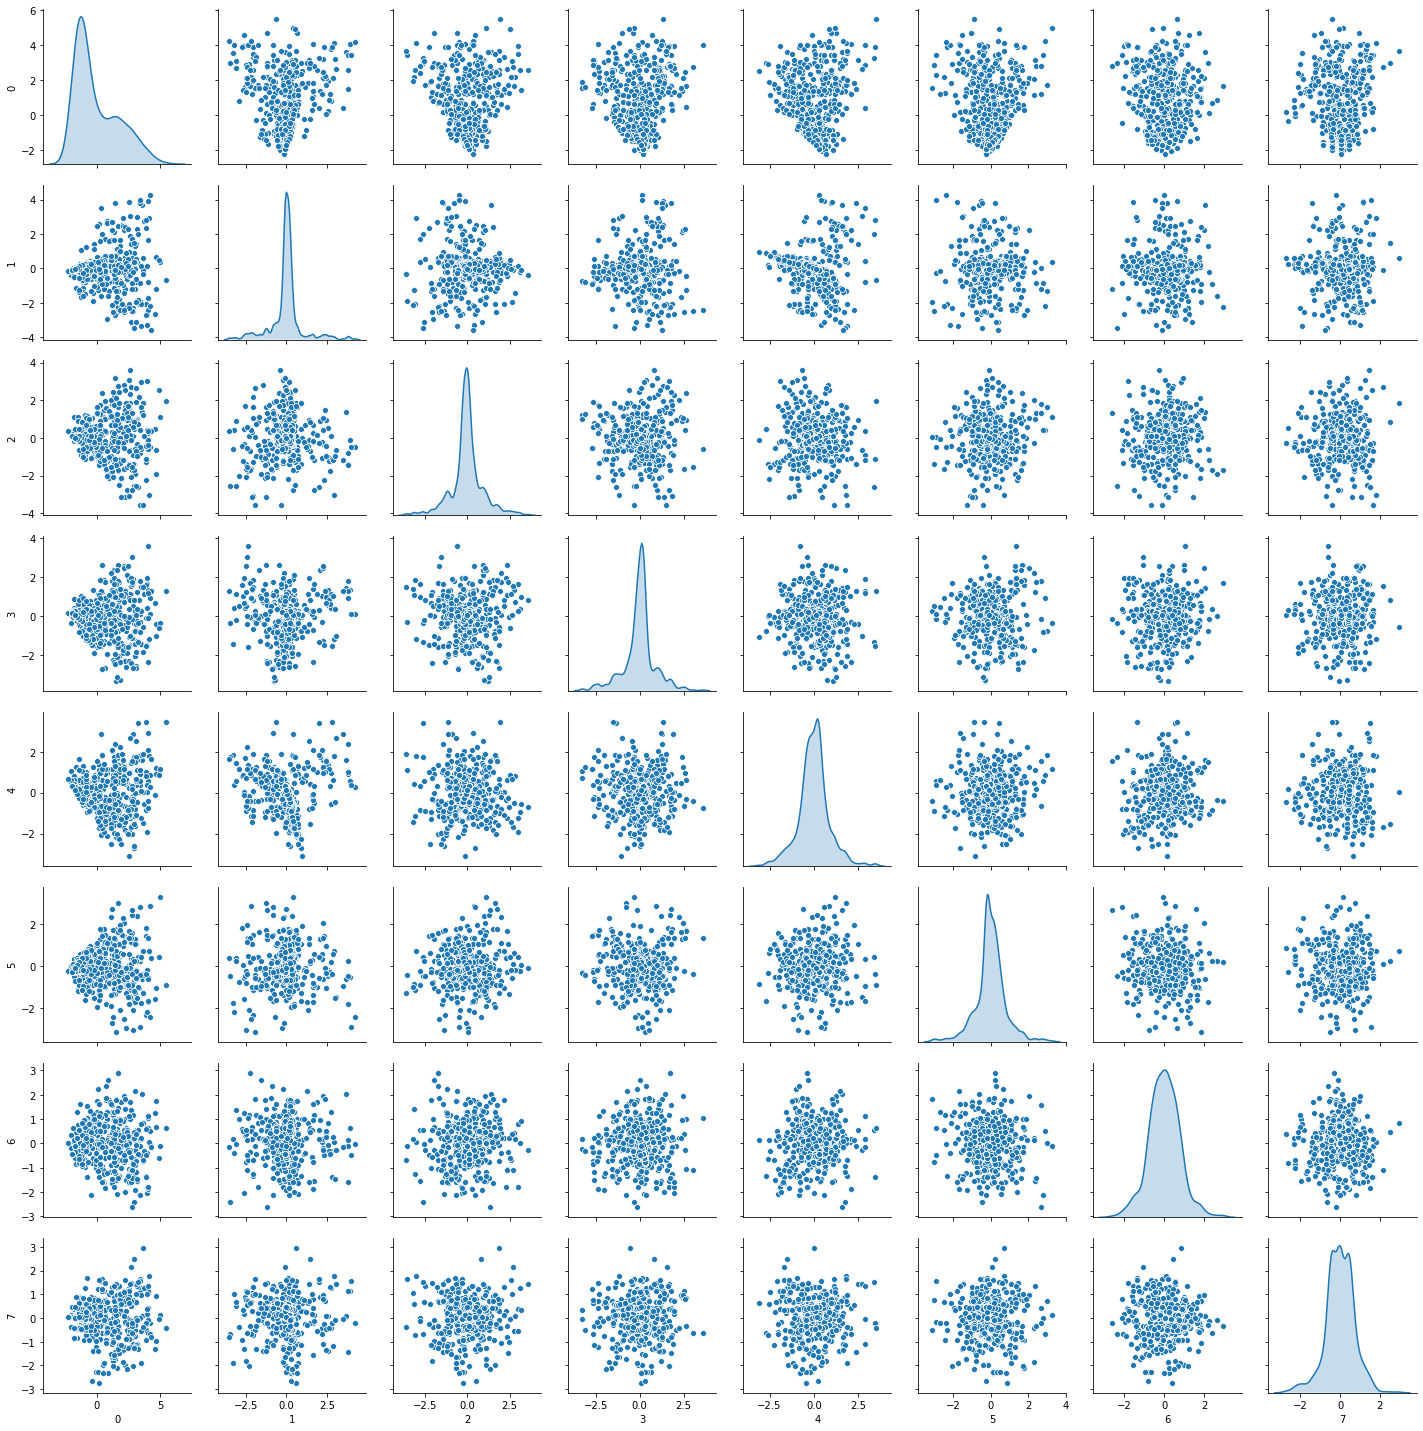

In [57]:
sns.pairplot(Proj_data_df, diag_kind='kde')

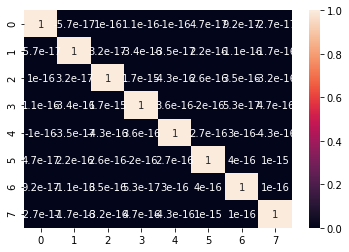

In [58]:
sns.heatmap(Proj_data_df.corr(),annot=True)